# Analysis of New England Surfing Days, 2020
Michael Shepard, MSDS 430, Northwestern University

# Introduction

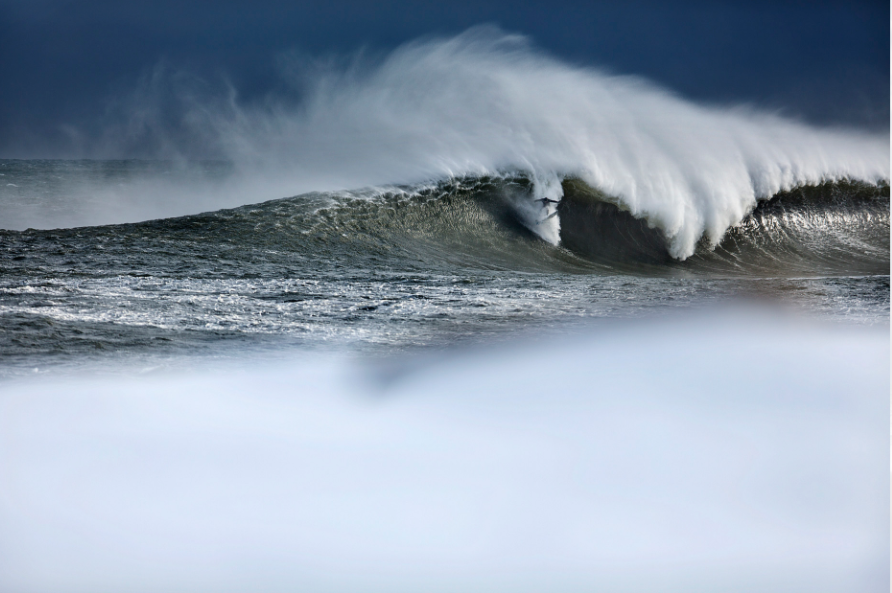

Project Overivew:
    I am a huge fan of surfing, and viewed this project as an awesome opportunity to use the skills we learned in class to analyze a surf location and figure out how many "good" days of surfing the location gets. A good day of surfing can be defined relatively easily with the right data as you only need to satisfy two conditions - (1) a minimum breaking wave height of ~2 feet and (2) offshore winds (i.e. winds that blow towards the ocean). Luckily, the National Oceanic and Atmospheric Administration ("NOAA") has buoy's placed around the world, and these buoys provide detailed & automatic readings of key wave and wind components to help accomplish this task.
    
What This Project Meant to Me:
    Surfing is a big part of my life, and part of the joy of surfing is the travel that comes along with it. There are so many great places to travel that also have excellent surf (Hawaii, Indonesia, and South Africa, just to name a few). Some of the best days I've had surfing in my life have been when I've discovered a new spot and am able to surf it by myself or with a few close friends. This project provided the opportunity to not only use the skills we've learned in class, but to also find new locations that people wouldn't particularly look at for surf. New England is a great example of this - a location many don't think of as a "surf desination", but can occasionally show rugged surfers scoring cold but picturesque waves. I was so interested in finding out just how many days a traveler could expect to get good surf in the north east.
    
Data Hypotheses:
    The first hypothesis I had in viewing this data is I expected less than 50% of days in a year to be "good" surfing days. The Atlantic Ocean is a much smaller ocean than the Pacific, and it is known for generally smaller waves and needing hurricane-level storms to bring strong surf. Additionally, New England weather has much more wind as compared to somewhere like California or Hawaii. Even if there are good size waves in the water, heavy winds can ruin them and make them unsurfable. Both of these factors are accounted for in my analysis. So, contrasting New England with a place like California or Hawaii, I would expect to only see < 50% of days that have "good" surf.
    
The next hypothesis I had was that we would expect to see a small number of good surfing days in summer months and much more good days in winter months. This is generally true of any surf location in the world that big, winter storms create more waves while summer doesn't produce storms with enough energy to create good surf. 
    
    
    

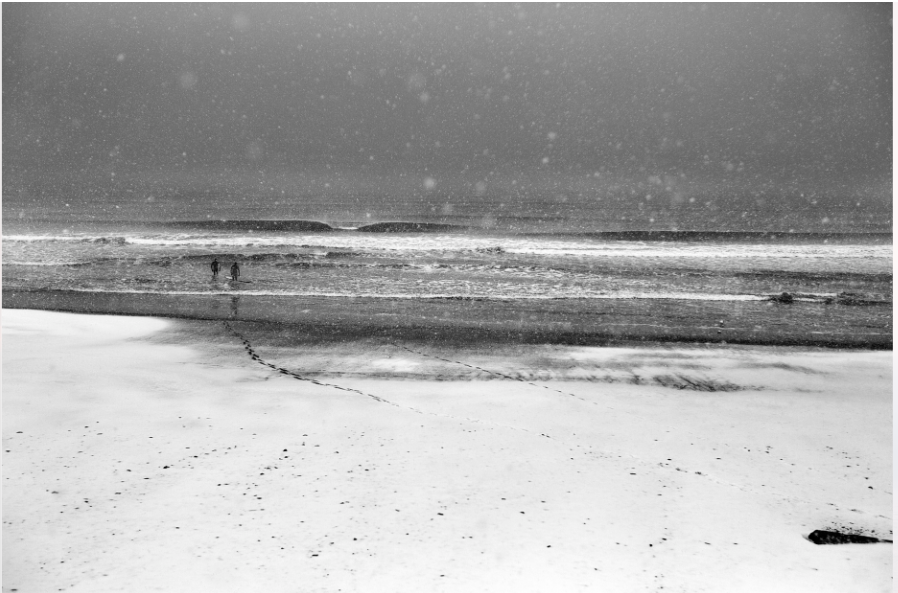

# Data Explained

Data Source Link:
    https://www.ndbc.noaa.gov/download_data.php?filename=44030h2020.txt.gz&dir=data/historical/stdmet/


    
Overview of Data Cleaning Process:
    The first step in my process was to pick a time of day to read our buoy data and extrapolate surf conditions for the day. I chose 7am because it is generally known that surfing in the morning has the highest chance for offshore winds. Through my cleaning process, I was able to prove that this is a correct assumption and 7am is the right time of day to take our reading through the use of boxplots and analyzing trend lines.
    Next, I needed to remove erroneous values from my data set. These consisted of wave heights and wind speeds that were erroneously recorded. I used for loops over my index values to filter out any erroneous values. This resulted 328 accurate readings of the year, representing ~90% coverage (328 / 365).
    Finally, I needed to add a few additional columns to my data. There were a couple easy ones - 'WVHT_ft' and 'WSPD_mph' took the inputted data given in metric units and converted it to standard US data (feet, miles per hour). There were a couple other columns that were more difficult. To understand the added columns of "Period_Cateogry & Wave_Treshold" it's important to have a basic understanding of wave period in surf forecasting. Wave period is very important because a wave hitting a buoy at 2 feet with a period of 7 seconds will produce a completely different wave than a 2 foot wave with a 15 second period when it hits the shore. As a very short summary, a wave with a longer period was generated by stronger winds and thus will convert much more kinetic energy when it hits the shore. Therefore, longer periods create bigger waves. For further reading, the below article breaks down this concept well: 
    
https://www.surfline.com/surf-news/the-importance-of-swell-period/1555



To account for wave period in our data, we will use the below "swell categories" to map our data input to the approprate swell category. With the help of numpy arrays and the .map() function, I was able to take my swell period data 'DPD' and map it to a category in the below chart. With these categories, I could then look at my wave height input (WVHT_ft) and check to see whether or not it would produce a breaking wave of above 2.5 feet (also known as a Cateogry 1 swell).

http://www.stormsurf.com/page2/papers/category_short.html

For each row in the data, I created the "Wave_Threshold" column that shows the minimum wave height we would need to register based on period to create a 2.5 foot breaking way. The "Wave_Checker" column checks this value against the 'WVHT_ft' column and returns True if the height is greater than the threshold, indicating we have enough swell in the water to produce good waves. 
Finally, my 'Wind_Checker' column checks whether the wind direction ('WDIR') is greater than 210 degrees, and return True or False. Thus, we can now say for each data input that if "Wave_Checker" and "Wind_Checker" are true, we can regsiter a good surfing day. 

Data Dictionary:

|Field Name | Description | Type
| --- | --- | --- |
| MM | Month | Integer
| DD | Day | Integer
| hh | Hour | Integer
| WDIR | Wind Direction (measured in degrees 0-360) | Integer
| WSPD | Wind Speed (measured in meters / second) | Integer
| WVHT | Wave Height (measured in meters) | Integer
| WVHT_ft | Wave Height (feet, added this column to convert from meters | Integer
| WSPD_mph | Wind Speed (MPH, added this column to convert from meters/second) | Integer
| DPD | Wave Period (measured in seconds) | Integer
| Period_Category | Added column, see description and methodology above | Integer
| Wave_Threshold | Added column, see description and methodology above | Integer
| Wave_Checker | Added column, see description and methodology above | Integer
| Wind_Checker | Added column, see description and methodology above | Integer

# Results

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_excel('EDAFinal_Clean_Data.xlsx')


# Analytical Process 1 - Finding # Good Days Surfing

After creating the appropriate data fields, I filtered my data frame to show when we had good waves and offshore winds (df.Wave_Checker == True & df.Wind_Checker == True)

Now, we can see in the chart below how many good surfing days we had by month in New England! We can see that December produced the most good days (13), with April and February falling in second and third place. We can also see that Summer months produce a small number of good surfing days, and the best time to surf is Fall - Spring.

Overall, my analysis resulted in 63 good surfing days in the year. This is much lower than the ~165 days I was expecting. However, my hypothesis of the summer months being weaker for surf vs. summer months proved true. 

In [2]:
df_checked = df[(df.Wave_Checker == True) & (df.Wind_Checker == True) ]

import plotly.express as px

counts = df_checked['MM'].value_counts()

fig = px.bar(df_checked, x=counts.index, y=counts, 
             labels={
                 "x": "Month",
                 "y": "Number of Good Days"
             },
            title = "Good Surfing Days")

fig.update_xaxes(
    ticktext=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    tickvals=["1","2","3","4","5","6","7","8","9","10","11","12"])

fig.show()

df_checked.shape

(63, 25)

# Analytical Process 2 - Wind Speed and Direction on Good Surf Days

Now, I wanted to dive a little deeper into how much wind was impacting my Good surfing days. Even if there is a day of offshore winds, a surf session can be ruined by winds that are too strong (i.e. winds > 20mph). 

We can plot this chart in a polar chart and show wind speed by direction. Given plotly's power, we can hover over our lines and see the accompanying wind speed with a given direction. We can see the largest line represents 17 MPH and is directly offshore, proving that my data set isn't hindered by any strong wind days. We can also show our surf community what kind of winds they can expect during a good surf session.

In [3]:
fig2 = px.bar_polar(df_checked, r="DD", theta="WDIR",
                   color="WSPD_MPH", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)

fig2.show()

# Analytical Process 3 - Box Plot of All Waves

A surfer might be interested to know what the distribution of waves look like for a given month. With the information below, we can show exactly how this data trends. The first thing that jumps out is the median for all months stays below 4 feet, while summer months show the lowest medians with wave heights around 2 feet. We can also see that outliers are relatively limited, with > 14 foot waves only occuring twice. This could inform someone that if they are hunting for "monster" waves, it's probably best to look for another place to surf.

In [4]:
fig3 = px.box(df, x='MM', y='WVHT_ft', labels=dict(WVHT_ft="Wave Height (ft)", MM="Month"), title="Wave Height Distribtion")
fig3.show()

# Analytical Process 4 - Analyzing Onshore Winds

Recall from above that our good surfing days filter out any onshore winds (wind directions between 0 and 210 degrees). One potential flaw with this assumption is that you could have onshore winds that are very light (< 2.5MPH) that would still produce an enjoyable surf. To account for this, we can create the polar plot below and visualize if there are any days that have light onshore winds.

As we can see, there are only 3 days that register "light" onshore winds. While this number is helpful, it doesn't dramatically change our output above and wouldn't radically change a user's decision to travel to New England or not.

In [5]:
df_bad_wind = df[(df.Wind_Checker == False) & (df.WSPD_MPH < 2.5)]


fig4 = px.bar_polar(df_bad_wind, r="DD", theta="WDIR",
                   color="WSPD_MPH", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)

fig4.show()

# Analytical Process 5 - Analyzing Wave Period

As discussed above, wave period is a crucial component of determining good surf. The chart below shows our wave period on each good surfing day. We can see the max period is 16 seconds, with values generally registering between 6 seconds and 12 seconds.

If we were to contrast this with a world class surf spot like Hawaii, we would likely see frequent wave periods of 20 seconds or above. This finding also confirms with our knowledge of the Atlantic Ocean that given the size of the ocean, it generally produces smaller periods and thus smaller waves.

In [6]:
fig5 = px.line(df_checked, y='DPD', title = "Wave Period Trend Line",labels=dict(DPD="Wave Period", index='Day of Year'))
fig5.show()

# Summary

My project accomplished what my original goal was - to provide an accurate and concise view of the number of days a surfer can expect to score good waves in New England. We can conclude that based on 2020 data, a surfer can expect to score good waves ~60 days of the year, and the best bet to visit is in Winter, Spring, and Fall months. Additionally, we can tell the surf community that offshore winds are generally mild (below 20 MPH), and if they are looking to score "monster" waves, New England probably isn't the location for them.

One difficulty I encountered was the data abberations that caused erroneous values for dates within the year that would show incorrect wave and wind data. Fortunately, the number of abberations was small enough that we were still able to use a great sample size of data and account for 90% of days in the year. However, if another buoy or year shows more abberations than this, the data set quickly becomes unuseful and it is difficult to obtain this data from other sources.

Additionally, it took me a lot of effort to figure out how to correctly map swell period. I had to learn numpy arrays, and find a way to map my period cateogry data across all values in my data frame. This really showed me the power of creating a user-defined function and using .map()!

For next steps, I would like to first add more years to the analysis. The NOAA buoy data has ~ 10 years of historical data, and it would be great to analyze this surf spot over more years than just 2020. 

Additionally, it would be great to conduct analysis on a more well-known surf destination (such as the North Shore of Oahu), and compare what this data would show vs. surfing in New England. 